#**Analysis of San-Francisco Police Department Incident Reports**

# Project Motivation

We chose the police department incident report dataset of SFO  because it offers a significant opportunity to use data science for social good. By analyzing this rich data set, we can gain important insights into crime patterns, help enhance public safety and inform police resource allocation. Using predictive analytics, we can look at areas where crime is most likely to occur, leading to more proactive policing and potentially reducing crime rates.

This is not just about numbers; It’s about using data to create safer, more informed communities. **Our research can guide policy making, improve law enforcement and build trust between police and the public**. Through this project we have the opportunity to make a tangible difference in society, turning data into actionable intelligence that can improve lives and strengthen the fabric of our communities. It’s the intersection of technology, social welfare and public safety – the perfect mix for meaningful, impactful data science.


Our project stands at the forefront of utilising data science techniques not just as a tool for analysis, but as a powerful medium to narrate compelling stories. Through our work, we aim to bring the below topics to light narratives -


1.   Relevance to Public Safety and Social Welfare

2.   Potential for Predictive Policing and Resource Allocation

3.   Community Engagement and Awareness

4.   Policy and Strategy Development

5.   Community Engagement and Awareness

6.   Transparency and Trust Building

7.   Identifying Societal and Environmental Factors

8.   Efficiency in Law Enforcement Operations


# Dataset Selected for Analysis

**Police Department Incident Reports (2018 to Present).**

**Contents**: This dataset encompasses detailed records of incidents reported to the police, including date and time of incidents, types of crimes, location details, and other pertinent information.

# Analytical Methodology

**Data Exploration** Thoroughly examined the dataset to understand its structure and the nature of the data.

**Data Cleaning and Preprocessing**: Handled Duplicates and null values from the dataset.

**Statistical Analysis**: Applied statistical methods to identify trends and patterns in crime incidents.

**Geospatial Analysis**: Mapped crime data to visualize geographic patterns and identify areas of high crime concentration.

**Temporal Analysis**: Analyzed crime data over time to identify trends related to different times of day, days of the week, or seasons.


# **Importing Libraries**

In [ ]:
# Import the required libraries
import pandas as pd
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sqlite3
from sqlite3 import Error

In [ ]:
# Create a connection to the database
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)
    return conn

# Create a table
def create_table(conn, create_table_sql, drop_table_name=None):
    if drop_table_name:
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)

# Execute a sql statement
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)
    rows = cur.fetchall()
    return rows

# Insert into the table
def insert_table(sql, conn, values):
    cur = conn.cursor()
    try:
        cur.executemany(sql, values)
        return cur.lastrowid
    except Error as e:
        print(e)

1.   ***create_connection function:*** Establishes a connection to the database or creates a new one if it doesn't exist.

2.   ***create_table function:*** Drops any existing table and creates a new empty table.

3.   ***execute_sql_statement function:*** Executes SQL statements.

4.   ***insert_table function:*** Inserts data into the created table.





#**Extract Data from CSV**

In [ ]:
# Initialize the variables
data = []

# Read from CSV
csv_file_path = 'processed_Police_Department_Incident_Reports__2018_to_Present.csv'

# Read each line from the csv file
with open(csv_file_path, 'r') as csv_file:
    lines = csv_file.readlines()

# Seperate out the headers
headers = lines[0].strip().split(',')

# Every row minus the header
for line in lines[1:]:
    data.append(line.strip().split(','))

# **Divison of data into  tables:**

**Incidents Table**

Purpose: Stores details about each incident.


**Location Table**

Purpose: Contains location-related information for each incident.

Foreign Key: IncidentID references Incidents(IncidentID).


**Report Table**

Purpose: Holds information about reports filed for incidents.

Foreign Key: IncidentID references Incidents(IncidentID).

**Supplementary_Info Table**

Purpose: Additional information related to incidents.

Foreign Key: IncidentID references Incidents(IncidentID).

**Time Table**

Purpose: Time-related data for incidents.

Foreign Key: IncidentID references Incidents(IncidentID).

**ER Diagram**



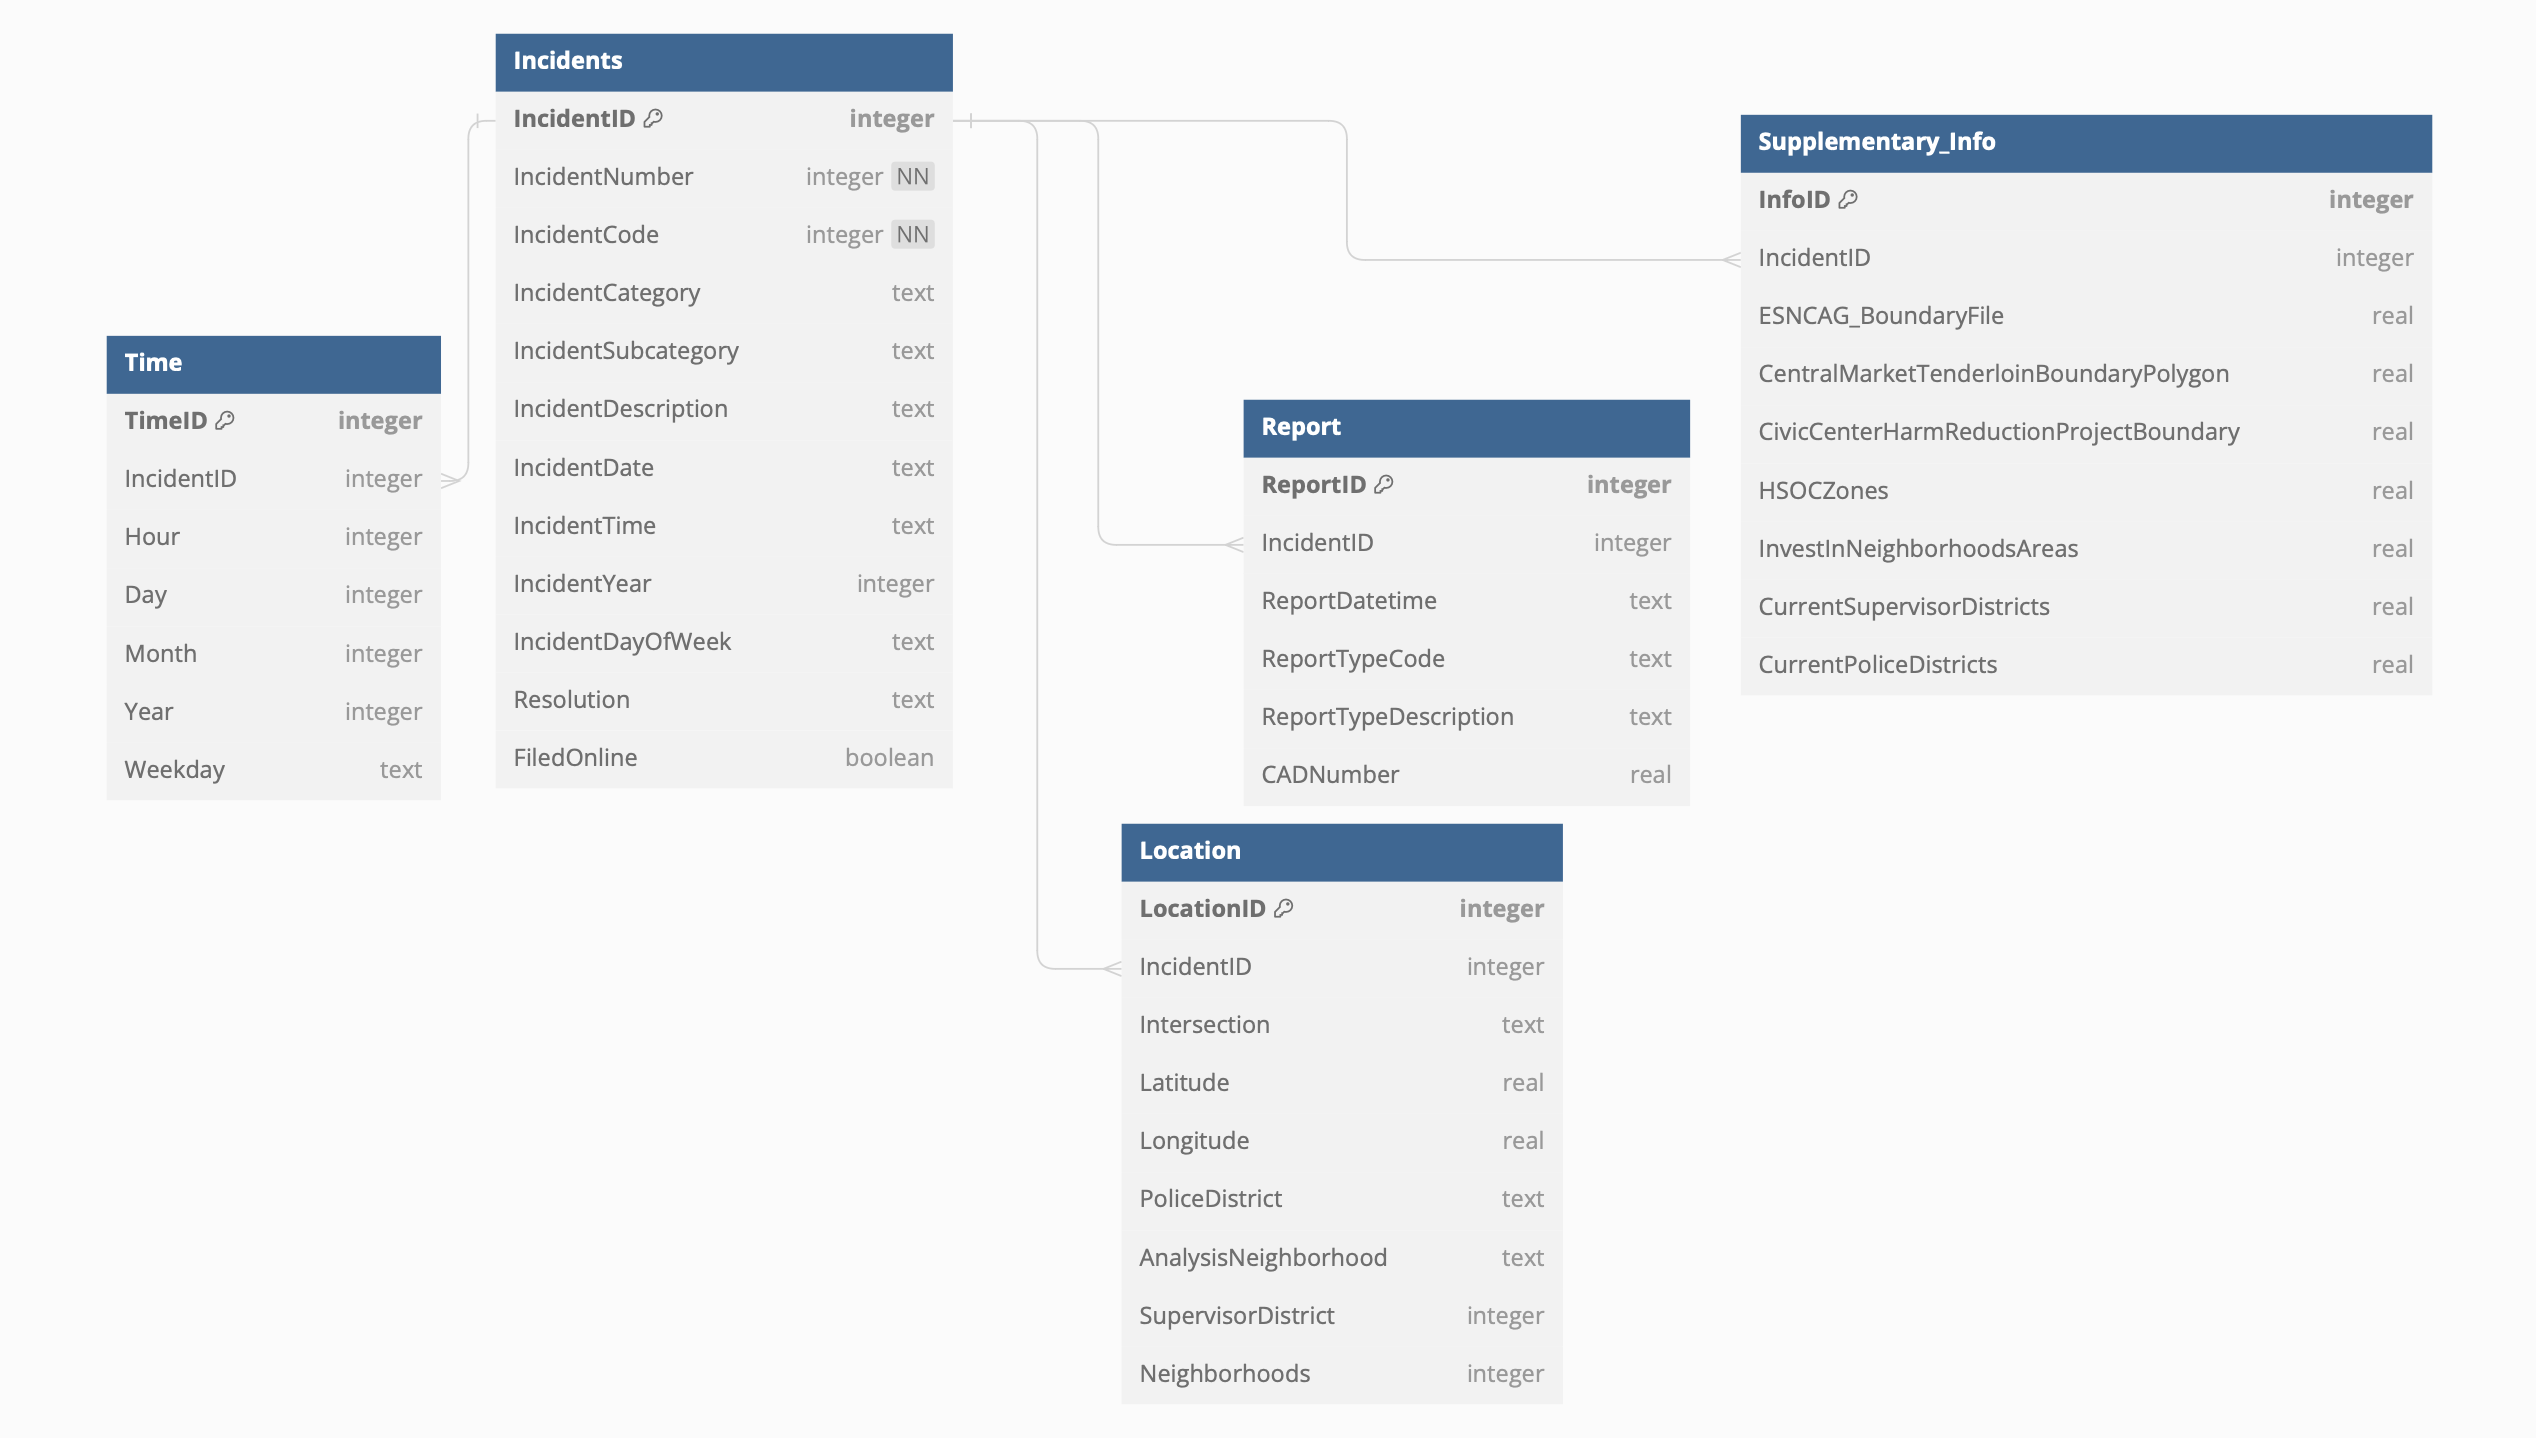



# Data Model Normalization

The Built Data Model Follows **3NF**

First Normal Form (1NF): Each table has a primary key (IncidentID, LocationID, ReportID, InfoID, and TimeID ) ensuring that each row is unique. The fields are atomic, meaning that there are no repeating groups or arrays.

Second Normal Form (2NF): Each table's non-primary-key column is dependent on the whole primary key. Since the primary keys are single fields, this condition is inherently met.

Third Normal Form (3NF): Non-key fields do not depend on other non-key fields. For example, IncidentDate and IncidentTime in the Incidents table are not dependent on non-key fields but only on the primary key IncidentID.

# **Incidents Table**

In [ ]:
# -------- Incidents Table ---------
# Establish a connection to the database
conn = create_connection('sfo_city_crime.db', delete_db = True)

# Initialize the variables
lst = []

# Extract the required fields for the table
for ele in data:
    incident_id = ele[headers.index('Incident ID')]
    incident_number = ele[headers.index('Incident Number')]
    incident_code = ele[headers.index('Incident Code')]
    incident_category = ele[headers.index('Incident Category')]
    incident_sub_category = ele[headers.index('Incident Subcategory')]
    incident_date = ele[headers.index('Incident Date')]
    incident_time = ele[headers.index('Incident Time')]
    incident_year = ele[headers.index('Incident Year')]
    incident_day_of_week = ele[headers.index('Incident Day of Week')]
    resolution = ele[headers.index('Resolution')]
    filed_online = ele[headers.index('Filed Online')]
    lst.append((incident_id, incident_number, incident_code, incident_category, incident_sub_category, incident_date, incident_time, incident_year, incident_day_of_week, resolution, filed_online))

# Create the table
sql_create_incidents_table = """
        CREATE TABLE IF NOT EXISTS Incidents (
        IncidentID INTEGER PRIMARY KEY,
        IncidentNumber INTEGER NOT NULL,
        IncidentCode INTEGER NOT NULL,
        IncidentCategory TEXT,
        IncidentSubcategory TEXT,
        IncidentDate TEXT,
        IncidentTime TEXT,
        IncidentYear INTEGER,
        IncidentDayOfWeek TEXT,
        Resolution TEXT,
        FiledOnline BOOLEAN
    );
"""
create_table(conn, sql_create_incidents_table,'Incidents')

# Insert into table
sql_insert_incident = '''
    INSERT INTO Incidents VALUES(?,?,?,?,?,?,?,?,?,?,?)
'''
insert_table(sql_insert_incident, conn, lst)

# Commit the changes
conn.commit()

# Close the connection
conn.close()


#**Location Table**

In [ ]:
# -------- Location Table -----
# Establish a connection to the database
conn = create_connection('sfo_city_crime.db')

# Initialize the variables
lst = []

# Extract the required fields for the table
for ele in data:
    incident_id = ele[headers.index('Incident ID')]
    intersection = ele[headers.index('Intersection')]
    latitude = ele[headers.index('Latitude')]
    longitude = ele[headers.index('Longitude')]
    police_dist = ele[headers.index('Police District')]
    analysis_hood = ele[headers.index('Analysis Neighborhood')]
    supervisor_dist = ele[headers.index('Supervisor District')]
    neighbourhoods = ele[headers.index('Neighborhoods')]
    lst.append((incident_id, intersection, latitude, longitude, police_dist, analysis_hood, supervisor_dist, neighbourhoods))

# Create the table
sql_create_location_table = """
    CREATE TABLE IF NOT EXISTS Location (
        LocationID INTEGER PRIMARY KEY AUTOINCREMENT,
        IncidentID INTEGER,
        Intersection TEXT,
        Latitude REAL,
        Longitude REAL,
        PoliceDistrict TEXT,
        AnalysisNeighborhood TEXT,
        SupervisorDistrict INTEGER,
        Neighborhoods INTEGER,
        FOREIGN KEY (IncidentID) REFERENCES Incidents (IncidentID)
    );
"""
create_table(conn, sql_create_location_table,'Location')

# Insert into table
sql_insert_location = '''
    INSERT INTO Location
    (IncidentID, Intersection, Latitude, Longitude, PoliceDistrict, AnalysisNeighborhood,
    SupervisorDistrict,Neighborhoods) VALUES(?,?,?,?,?,?,?,?)
    '''
insert_table(sql_insert_location, conn, lst)

# Commit the changes
conn.commit()

# Close the connection
conn.close()

# **Report Table**

In [ ]:
# -------- Report Table -----
# Establish a connection to the database
conn = create_connection('sfo_city_crime.db')

# Initialize the variables
lst = []

# Extract the required fields for the table
for ele in data:
    incident_id = ele[headers.index('Incident ID')]
    report_datetime = ele[headers.index('Report Datetime')]
    report_type_code = ele[headers.index('Report Type Code')]
    report_type_desc = ele[headers.index('Report Type Description')]
    cad_number = ele[headers.index('CAD Number')]
    lst.append((incident_id, report_datetime, report_type_code, report_type_desc, cad_number))

# Create the table
sql_create_report_table = """
    CREATE TABLE IF NOT EXISTS Report (
        ReportID INTEGER PRIMARY KEY AUTOINCREMENT,
        IncidentID INTEGER,
        ReportDatetime TEXT,
        ReportTypeCode TEXT,
        ReportTypeDescription TEXT,
        CADNumber REAL,
        FOREIGN KEY (IncidentID) REFERENCES Incidents (IncidentID)
    );
"""
create_table(conn, sql_create_report_table,'Report')

# Insert into table
sql_insert_report = '''
    INSERT INTO Report(IncidentID, ReportDatetime, ReportTypeCode,
    ReportTypeDescription, CADNumber) VALUES(?,?,?,?,?)
    '''
insert_table(sql_insert_report, conn, lst)

# Commit the changes
conn.commit()

# Close the connection
conn.close()

#**Supplementary_info Table**

In [ ]:
# ---------- Supplementary_info table ----
# Establish a connection to the database
conn = create_connection('sfo_city_crime.db')

# Initialize the variables
lst = []

# Extract the required fields for the table
for ele in data:
    incident_id = ele[headers.index('Incident ID')]
    bound_file = ele[headers.index('ESNCAG - Boundary File')]
    cmtl_boundary_poly = ele[headers.index('Central Market/Tenderloin Boundary Polygon - Updated')]
    harm_reduction = ele[headers.index('Civic Center Harm Reduction Project Boundary')]
    hsoc_zones = ele[headers.index('HSOC Zones as of 2018-06-05')]
    iin_areas = ele[headers.index('Invest In Neighborhoods (IIN) Areas')]
    cur_supervisor_dist = ele[headers.index('Current Supervisor Districts')]
    cur_police_dist = ele[headers.index('Current Police Districts')]
    lst.append((incident_id, bound_file, cmtl_boundary_poly, harm_reduction, hsoc_zones, iin_areas, cur_supervisor_dist, cur_police_dist))

# Create the table
sql_create_supplementary_info_table = """
    CREATE TABLE IF NOT EXISTS Supplementary_Info (
            InfoID INTEGER PRIMARY KEY AUTOINCREMENT,
            IncidentID INTEGER,
            ESNCAG_BoundaryFile REAL,
            CentralMarketTenderloinBoundaryPolygon REAL,
            CivicCenterHarmReductionProjectBoundary REAL,
            HSOCZones REAL,
            InvestInNeighborhoodsAreas REAL,
            CurrentSupervisorDistricts REAL,
            CurrentPoliceDistricts REAL,
            FOREIGN KEY (IncidentID) REFERENCES Incidents (IncidentID)
        );
    """
create_table(conn, sql_create_supplementary_info_table,'Supplementary_Info')

# Insert into table
sql_insert_supplementary_info = '''
            INSERT INTO Supplementary_Info(IncidentID, ESNCAG_BoundaryFile, CentralMarketTenderloinBoundaryPolygon, CivicCenterHarmReductionProjectBoundary, HSOCZones, InvestInNeighborhoodsAreas, CurrentSupervisorDistricts, CurrentPoliceDistricts)
            VALUES(?,?,?,?,?,?,?,?);
        '''
insert_table(sql_insert_supplementary_info, conn, lst)

# Commit the changes
conn.commit()

# Close the connection
conn.close()

#**Time Table**

In [ ]:
# ---------- Time table --------
# Establish a connection to the database
conn = create_connection('sfo_city_crime.db')

# Initialize the variables
lst = []

# Extract the required fields for the table
for ele in data:
    incident_id = ele[headers.index('Incident ID')]
    incident_datetime_str = ele[headers.index('Incident Datetime')]
    original_format = '%d/%m/%Y %H:%M'
    desired_format = '%Y-%m-%d %I:%M:%S %p'
    parsed_date = datetime.strptime(incident_datetime_str, original_format)
    incident_datetime = parsed_date.strftime(desired_format)
    hour = parsed_date.hour
    day = parsed_date.day
    month = parsed_date.month
    year = parsed_date.year
    weekday = parsed_date.strftime('%A')
    lst.append((incident_id, hour, day, month, year, weekday))

# Create the table
sql_create_time_table = """
    CREATE TABLE IF NOT EXISTS Time (
        TimeID INTEGER PRIMARY KEY AUTOINCREMENT,
        IncidentID INTEGER,
        Hour INTEGER,
        Day INTEGER,
        Month INTEGER,
        Year INTEGER,
        Weekday TEXT,
        FOREIGN KEY (IncidentID) REFERENCES Incidents (IncidentID)
    );
"""
create_table(conn, sql_create_time_table,'Time')

# Insert into table
sql_insert_time = '''
        INSERT INTO Time(IncidentID, Hour, Day, Month, Year, Weekday) VALUES(?,?,?,?,?,?)
    '''
insert_table(sql_insert_time, conn, lst)

# Commit the changes
conn.commit()

# Close the connection
conn.close()

# SQL query performing joins to reconstruct the original data and load into DataFrame

In [ ]:
conn = create_connection('sfo_city_crime.db')
sql='''select Incidents.IncidentID,
        Incidents.IncidentNumber,
        Incidents.IncidentCode,
        Incidents.IncidentCategory,
        Incidents.IncidentSubcategory,
        Incidents.IncidentDate,
        Incidents.IncidentTime,
        Incidents.IncidentYear,
        Incidents.IncidentDayOfWeek,
        Incidents.Resolution,
        Incidents.FiledOnline,

        Location.LocationID,
        Location.IncidentID,
        Location.Intersection,
        Location.Latitude,
        Location.Longitude,
        Location.PoliceDistrict,
        Location.AnalysisNeighborhood,
        Location.SupervisorDistrict,
        Location.Neighborhoods,

        Report.ReportID,
        Report.IncidentID,
        Report.ReportDatetime,
        Report.ReportTypeCode,
        Report.ReportTypeDescription,
        Report.CADNumber,

        Supplementary_Info.InfoID,
        Supplementary_Info.IncidentID,
        Supplementary_Info.ESNCAG_BoundaryFile,
        Supplementary_Info.CentralMarketTenderloinBoundaryPolygon,
        Supplementary_Info.CivicCenterHarmReductionProjectBoundary,
        Supplementary_Info.HSOCZones,
        Supplementary_Info.InvestInNeighborhoodsAreas,
        Supplementary_Info.CurrentSupervisorDistricts,
        Supplementary_Info.CurrentPoliceDistricts,

        Time.TimeID,
        Time.IncidentID,
        Time.Hour,
        Time.Day,
        Time.Month,
        Time.Year,
        Time.Weekday

        from Incidents
        join Location on Location.IncidentID=Incidents.IncidentID
        join Report on Report.IncidentID=Incidents.IncidentID
        join Supplementary_Info on Supplementary_Info.IncidentID=Incidents.IncidentID
        join Time on Time.IncidentID=Incidents.IncidentID
'''

data=pd.read_sql_query(sql,conn)
print(data)

       IncidentID  IncidentNumber  IncidentCode     IncidentCategory  \
0         1253736       230167874          7041    Recovered Vehicle   
1         1253795       236046151          6374        Larceny Theft   
2         1253571       220343896          7041    Recovered Vehicle   
3         1253551       230174885          7041    Recovered Vehicle   
4         1254024       230176728          7041    Recovered Vehicle   
...           ...             ...           ...                  ...   
673169    1256722       236042290          6244        Larceny Theft   
673170    1256667       230200775         74000       Missing Person   
673171    1256853       230201949          3401              Robbery   
673172    1256873       230202486          6303        Larceny Theft   
673173    1256767       230201450          7021  Motor Vehicle Theft   

                  IncidentSubcategory IncidentDate IncidentTime  IncidentYear  \
0                   Recovered Vehicle   13/03/2023    

In [ ]:
# Establish a connection to the database
conn = create_connection('sfo_city_crime.db')

# Query to select incident categories and dates from the Incidents table
query = """
SELECT IncidentCategory, IncidentDate
FROM Incidents
WHERE IncidentCategory IS NOT NULL AND IncidentDate IS NOT NULL
"""

# Add a new column 'Year'
df_incidents = pd.read_sql_query(query, conn)
df_incidents['Year'] = pd.to_datetime(df_incidents['IncidentDate'], format='%d/%m/%Y', errors='coerce').dt.year

# Drop any rows with missing values in the 'Year' column and converts it to an integer
df_incidents.dropna(subset=['Year'], inplace=True)
df_incidents['Year'] = df_incidents['Year'].astype(int)

# Grouping of data
df_grouped = df_incidents.groupby(['Year', 'IncidentCategory']).size().reset_index(name='Count')

# Data pivoting
df_pivot = df_grouped.pivot(index='Year', columns='IncidentCategory', values='Count').fillna(0)

# Reshapes the DataFrame into a long format making it suitable for plotting
df_long = df_pivot.reset_index().melt(id_vars='Year', var_name='IncidentCategory', value_name='Count')

# Plot the figure
fig = px.line(df_long, x='Year', y='Count', color='IncidentCategory',
              labels={'Count':'Number of Incidents', 'IncidentCategory':'Incident Category'},
              title='Trend Analysis of Incident Categories Over Time')
fig.show()

Observations from the Trend Analysis of Incident Categories Over Time:

1. **Assault Incidents**:
A noticeable peak is evident, indicating a potential area of concern or increased attention.

2. **Stable Trends**:
Most categories exhibit consistent trends, implying effective incident management and stability.

3. **Yearly Variations**:
Fluctuations across years suggest possible seasonal effects or the impact of policies implemented during specific periods.

4. **Rare Incident Data**:
The low frequency in the 'Human Trafficking' category may suggest either underreporting or successful interventions in addressing such incidents.

5. **Anomalous Peaks**:
Sharp increases in certain categories raise the need for verification to ensure accuracy and investigate if there are actual upticks in crime.

6. **Resource Allocation**:
The data provides insights for strategic planning in law enforcement, aiding in the distribution of resources effectively.

7. **Policy Implications**:
Trends serve as valuable information for the development and assessment of crime prevention strategies, informing policymaking decisions.

In [ ]:
# Incident frequency on a per-day basis
# Convert 'IncidentDate' to datetime format
df_incidents['IncidentDate'] = pd.to_datetime(df_incidents['IncidentDate'], format='%d/%m/%Y', errors='coerce')

# Extract Day of the Week
df_incidents['DayOfWeek'] = df_incidents['IncidentDate'].dt.day_name()

# Group and Aggregate by Day of the Week
df_day_of_week = df_incidents.groupby('DayOfWeek').size().reset_index(name='Frequency')

# Order Days of the Week
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_of_week['DayOfWeek'] = pd.Categorical(df_day_of_week['DayOfWeek'], categories=ordered_days, ordered=True)
df_day_of_week = df_day_of_week.sort_values('DayOfWeek')

# Plot the figure
fig = px.bar(df_day_of_week, x='DayOfWeek', y='Frequency',
             title='Incident Frequency by Day of the Week',
             labels={'Frequency': 'Number of Incidents', 'DayOfWeek': 'Day of the Week'},
             color='DayOfWeek')
fig.show()

The chart measures the number of incidents that occurred on each day of the week. Each bar represents a day, with the height corresponding to the number of incidents.

* The highest number of incidents occurs on Friday, as indicated by the tallest orange bar. This suggests that Friday might be the busiest or most incident-prone day of the week.

* The next highest days, though not by a significant margin, appear to be Wednesday and Thursday, suggesting a midweek increase in incident frequency.

* Monday and Sunday have the lowest number of incidents, as indicated by the shortest bars, which could imply a lower level of the triggering activity of these incidents or more effective management or prevention strategies on these days.

By understanding the days when specific crimes are more likely to occur, preventative measures can be tailored. For example, if civil sidewalk incidents are more common during the weekdays, perhaps due to increased pedestrian traffic, city planners can consider strategies to mitigate these issues during those times.


In [ ]:
# Query to retrieve incident frequency data by hour and incident category
query = """
SELECT t.Hour, i.IncidentCategory, COUNT(*) as Frequency
FROM Time t
INNER JOIN Incidents i ON t.IncidentID = i.IncidentID
GROUP BY t.Hour, i.IncidentCategory
ORDER BY t.Hour
"""

# Load the results into a DataFrame
df_time_of_day = pd.read_sql_query(query, conn)

# Format the 'Hour' column to display hours in 24-hour format with leading zeros
df_time_of_day['Hour'] = df_time_of_day['Hour'].apply(lambda x: f"{x:02d}:00")

# Create a scatter plot
fig = px.scatter(df_time_of_day, x='Hour', y='Frequency', color='IncidentCategory',
                 title='Incident Frequency by Time of Day',
                 labels={'Frequency': 'Number of Incidents', 'Hour': 'Time of Day'},
                 category_orders={"Hour": sorted(df_time_of_day['Hour'].unique())})
fig.show()

* There are notable peaks around midnight (00:00) for certain incidents, which is common for crimes like assault and disorderly conduct, possibly due to nightlife activity.

* Another peak occurs in the late afternoon and evening (around 18:00 to 23:00), which could correlate with increased social activity and the closing hours of businesses.

* Nighttime Activity: The data suggests that the frequency of incidents increases during the night, which might be due to reduced visibility for monitoring, increased alcohol consumption, or other factors associated with night.

* Evening Peak: The evening peak could be due to various factors such as increased pedestrian traffic, rush hour, or the closure of establishments which may contribute to a rise in certain types of incidents.

* Variability of Incidents: Certain crimes, such as homicide and human trafficking, do not show a strong correlation with time, indicating they may occur more randomly or that their occurrence is independent of the time of day.

To fully understand the implications, additional context such as location data and demographic information would be necessary.

We will now visualize the Location data

In [ ]:
# Query to retrieve incident count data for each unique latitude and longitude
query = """
SELECT Latitude, Longitude, COUNT(*) as IncidentCount
FROM Location
WHERE Latitude IS NOT NULL AND Longitude IS NOT NULL
GROUP BY Latitude, Longitude
"""

# Load the results into a DataFrame
df_locations = pd.read_sql_query(query, conn)
df_locations['IncidentCount'] = df_locations['IncidentCount'].astype(str)

df_locations['Latitude'] = pd.to_numeric(df_locations['Latitude'])
df_locations['Longitude'] = pd.to_numeric(df_locations['Longitude'])
df_locations['IncidentCount'] = pd.to_numeric(df_locations['IncidentCount'])

fig = px.scatter_mapbox(df_locations,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="IncidentCount",
                        hover_data={"Latitude": False, "Longitude": False, "IncidentCount": True},
                        color_discrete_sequence=["fuchsia"],
                        zoom=10,
                        height=300)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# Show the figure
fig.show()


* There are a few distinct clusters where the incident count is significantly higher. These clusters could represent areas with higher population density, commercial areas, or areas with specific socio-economic factors that contribute to a higher number of incidents.

* The areas with the highest incident counts could be critical for law enforcement and public service agencies to focus their efforts, whether in patrolling, community outreach, or resource allocation.

In [ ]:
# Query to retrieve incident count data for each year
query = """
SELECT IncidentYear, COUNT(*) as IncidentCount
FROM Incidents
GROUP BY IncidentYear
"""

# Load the results into a Pandas DataFrame
df_yearly_incidents = pd.read_sql_query(query, conn)

# Create a bar chart
fig = px.scatter(df_yearly_incidents, x='IncidentYear', y='IncidentCount',
                 title='Yearly Comparison of Incident Numbers',
                 labels={'IncidentCount': 'Number of Incidents', 'IncidentYear': 'Year'},
                 size='IncidentCount',  # Optional: size points by incident count
                 color='IncidentCount',  # Optional: color points by incident count
                 trendline="ols")  # Optional: add a trendline to show the overall trend

# Customize the layout
fig.update_layout(xaxis=dict(title='Year'),
                  yaxis=dict(title='Number of Incidents'),
                  legend=dict(title='Legend', orientation='h', y=1, x=0.5, xanchor='center', yanchor='bottom'))

# Show the figure
fig.show()

* Potential Impact of External Factors: The sharp drop in 2020 might be associated with external factors such as the COVID-19 pandemic, which may have led to lockdowns, restrictions, or changes in social behavior.

* Recovery and Fluctuation: The slight rebound in 2021 and 2022 could suggest a return to pre-pandemic patterns or an adjustment to new norms.

* Continued Decrease: The continued decrease in 2023 suggests that the factors leading to the reduction in incidents are still active or that new measures implemented have been effective.

In [ ]:
# Query to retrieve incident count data for each police district
query = """
SELECT PoliceDistrict, COUNT(*) as IncidentCount
FROM Location
GROUP BY PoliceDistrict
HAVING IncidentCount > 100
"""

# Load the results into a DataFrame
df_police_districts = pd.read_sql_query(query, conn)

# Create a bar chart
fig = px.bar(df_police_districts, x='PoliceDistrict', y='IncidentCount',
             title='Number of Incidents in Different Police Districts',
             labels={'IncidentCount': 'Number of Incidents', 'PoliceDistrict': 'Police District'},
             color='PoliceDistrict')  # Color-coded by police district
fig.show()

* Resource Allocation: The Central district records the highest number of incidents, followed closely by the Southern district, suggesting a need for a concentrated allocation of law enforcement resources and community safety programs in these areas.

* Community Safety: Districts like Park, Richmond, and Taraval report lower incident numbers, which may indicate more effective community safety measures, lower population densities, or different socio-economic conditions that result in fewer incidents.

* Strategic Planning: The data could guide strategic planning for the police force, with potential for deploying more patrol units or community policing efforts in districts with higher incidents, while also analyzing low-incident districts to replicate successful safety strategies across the city.

In [ ]:
# Query to retrieve incident count data for each neighborhood and incident category
query = """
SELECT l.AnalysisNeighborhood, i.IncidentCategory, COUNT(*) as IncidentCount
FROM Location l
INNER JOIN Incidents i ON l.IncidentID = i.IncidentID
GROUP BY l.AnalysisNeighborhood, i.IncidentCategory
HAVING IncidentCount > 100
"""

# Load the results into a DataFrame
df_neighborhood_incidents = pd.read_sql_query(query, conn)

# Pivot the DataFrame to create a table of incident counts by neighborhood and category
df_pivot = df_neighborhood_incidents.pivot_table(index='AnalysisNeighborhood',
                                                 columns='IncidentCategory',
                                                 values='IncidentCount',
                                                 fill_value=0)

# Create a stacked bar chart
fig = px.bar(df_pivot, x=df_pivot.index, y=df_pivot.columns,
             title='Analysis of Incident Categories by Neighborhood',
             labels={'value': 'Number of Incidents', 'variable': 'Incident Category'},
             orientation='v',  # Vertical bars
             barmode='stack')  # Stacked bars
fig.show()

* Diverse Incident Profiles: Neighborhoods exhibit varied profiles of incident types. Some neighborhoods, like Mission and Tenderloin, show a high number of incidents across multiple categories, suggesting they are hotspots for a variety of police-reported activities.

* Prevalent Incident Types: Certain incident types, such as assault and burglary, appear to be more prevalent across most neighborhoods, indicated by the consistent presence of their corresponding colors across the bars.

* Neighborhood-Specific Issues: Some neighborhoods have distinctive patterns, such as a high number of drug offenses or disorderly conduct, which could reflect unique local challenges or demographics.

In [ ]:
# Query to join Incidents and Time tables and select the necessary fields
query = """
SELECT t.Hour, i.IncidentCategory, COUNT(*) as IncidentCount
FROM Time t
INNER JOIN Incidents i ON t.IncidentID = i.IncidentID
GROUP BY t.Hour, i.IncidentCategory
ORDER BY t.Hour
"""

# Load the results into a DataFrame
df_hourly_incidents = pd.read_sql_query(query, conn)

# Pivot the DataFrame to create a table of incident counts by hour and incident category
df_pivot = df_hourly_incidents.pivot_table(index='IncidentCategory',
                                           columns='Hour',
                                           values='IncidentCount',
                                           fill_value=0)

# Create an image-style heatmap
fig = px.imshow(df_pivot,
                labels=dict(x="Hour of Day", y="Incident Category", color="Incident Count"),
                x=df_pivot.columns,
                y=df_pivot.index,
                title='Correlation between Time of Day and Incident Types')
fig.show()

The heatmap displays the correlation between the time of day and various incident types, with the intensity of the color representing the incident count.

* Most Frequent Incidents: Certain incidents, such as burglary and drug violations, appear more frequently, shown by the brighter bands across their rows. These incidents are more common at specific times, possibly at night.

* Time-specific Incidents: Some incidents, like traffic violation arrests, have a pronounced time-specific occurrence, likely during the day which is consistent with higher traffic volumes.

* Uniform Distribution: Several incident types, including non-criminal and lost property reports, show a more uniform distribution across all hours, indicating these events are reported consistently throughout the day.

In [ ]:
# Query to select the supervisor district and count of incidents
query = """
SELECT SupervisorDistrict, COUNT(*) as IncidentCount
FROM Location
GROUP BY SupervisorDistrict
HAVING IncidentCount > 100
"""

# Load the results into a Pandas DataFrame
df_supervisor_districts = pd.read_sql_query(query, conn)

# Create a bar chart
fig = px.bar(df_supervisor_districts, x='SupervisorDistrict', y='IncidentCount',
             title='Incident Trends by Supervisor Districts',
             labels={'IncidentCount': 'Number of Incidents', 'SupervisorDistrict': 'Supervisor District'},
             color='SupervisorDistrict')  # Color-coded by supervisor district
fig.show()

1. **Disparity in Distribution**: There is a marked disparity in incident counts across supervisor districts, with District 3 having the highest number of incidents, which could indicate a hotspot for activity requiring police attention or public services.

2. **Potential for Strategic Resource Allocation**: The data suggests that certain districts may benefit from increased law enforcement resources or targeted community programs to address and mitigate the high number of incidents.

3. **Opportunities for Best Practice Sharing**: Lower incident districts such as 4, 8, and 11 could be studied to identify effective strategies or community characteristics that contribute to lower incident rates, potentially serving as models for other districts.

In [ ]:
# Query to select the FiledOnline status and count of incidents
query = """
SELECT FiledOnline, COUNT(*) as IncidentCount
FROM Incidents
GROUP BY FiledOnline
"""

# Load the results into a Pandas DataFrame
df_filed_online = pd.read_sql_query(query, conn)

# Create a new column 'ReportType' to label the FiledOnline status as 'Online' or 'In Person'
df_filed_online['ReportType'] = df_filed_online['FiledOnline'].apply(lambda x: 'Online' if x else 'In Person')

# Create a pie chart
fig = px.pie(df_filed_online, names='ReportType', values='IncidentCount',
             title='Proportion of Online Filed Reports vs. Direct Reports',
             color='ReportType',  # Color-coded by report type
             color_discrete_map={'Online':'blue', 'In Person':'orange'})  # Custom color mapping
fig.show()

The pie chart depicts the proportion of incident reports filed online versus in person. From the chart, we can discern the following:

1. **Majority Preference**: A significant majority, 75.8%, of reports are filed in person, indicating that this method is the preferred or required approach for most incidents.

2. **Online Reporting Usage**: Online reporting is utilized to a lesser extent, accounting for 24.2% of reports, which suggests that while there is a notable adoption of digital reporting methods, it has not yet overtaken traditional in-person reporting.

3. **Implications for Service Delivery**: The data could imply that while online reporting systems are in place and being used, there may be opportunities to increase their usage. This could involve improving the accessibility and user-friendliness of online reporting systems, or it could reflect the nature of incidents that may require in-person verification or assistance.

In [ ]:
# Define the category of interest for analysis
category_of_interest = 'Drug Offense'  # Any Category we want, We can discuss which all to include here

# Query for temporal analysis of incidents in the specified category over time
query_time = f"""
SELECT IncidentYear, COUNT(*) as IncidentCount
FROM Incidents
WHERE IncidentCategory = '{category_of_interest}'
GROUP BY IncidentYear
"""

# Load the results into a Pandas DataFrame
df_category_time = pd.read_sql_query(query_time, conn)

# Create a line chart for temporal analysis of incidents over time
fig_time = px.line(df_category_time, x='IncidentYear', y='IncidentCount',
                   title=f'Temporal Analysis of {category_of_interest} Incidents Over Time',
                   labels={'IncidentCount': 'Number of Incidents', 'IncidentYear': 'Year'})
fig_time.show()



The line graph depicts the number of drug offense incidents reported annually from 2018 to 2023.

1. Downward Trend: There was a decline in drug offense incidents from 2018 to 2020, suggesting an effective intervention or a change in reporting or policing policy during those years.

2. Sharp Increase in 2021: The number of incidents significantly increased in 2021. This could be due to a change in legislation, enforcement practices, societal impacts, or other factors not immediately evident from the graph.

3. Stabilization: Post-2021, the incident count appears to stabilize and remains consistent into 2023, indicating that the factors leading to the 2021 spike may have been addressed or normalized.

These observations highlight the dynamic nature of drug-related incidents over time and may inform policy adjustments or resource allocation for law enforcement agencies.

#Summary
The charts show that crimes happen more often during certain times and in certain places. Drug-related crimes went down and then suddenly went up again in 2021, which could be because of changes in the law or how people act. Most people report crimes online instead of in person. Different areas of the city have different crime rates, so police need to focus on the places and times where crimes happen the most. This information helps the police and city leaders decide where to put their efforts to keep the community safe.